#Trabalho prático # 1
##Introdução à Computação Numérica

###Tópico: Aritmética de ponto flutuante

---

Nome: Riquelme Freitas Gomes

DRE: 120032785


---

**Instruções:** 

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos** 

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.  

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 21/setembro/2022* 

---


## Tarefa #1: Calculando aproximações do número $\pi$.

As seguintes fórmulas para o número $\pi$ usam séries (somas com um número infinito de termos) em que cada termo da série envolve apenas operações aritméticas elementares. Aproximações de $\pi$ então podem ser obtidas considerando apenas um número finito de termos nas somas correspondentes (séries truncadas). 

a) Fórmula de Gregory-Leibniz:
$$\pi = 4\sum_{k=0}^\infty \frac{(-1)^k}{2k+1}$$ 
b) Fórmula de Newton-Euler:
$$\pi = 2\sum_{k=0}^\infty \frac{(2)^{k}(k!)^2}{(2k+1)!}$$   
c) Fórmula de Bailey-Borwein-Plouffe:
$$\pi = \sum_{k=0}^\infty \left(\frac{4}{8k+1}-\frac{2}{8k+4}-\frac{1}{8k+5}-\frac{1}{8k+6}\right)\frac{1}{16^k}$$  

Faça a implementação dessas fórmulas e obtenha diferentes aproximações de $\pi$, variando a quantidade de termos usados nas séries truncadas. Considere as séries truncadas com 5, 10, 50, 100 e 1000 termos. Compare os resultados, estimando o erro absoluto de cada aproximação usando como valor "exato" a aproximação *math.pi* fornecida pelo *módulo math* do Python.
Qual desses métodos deu o melhor resultado?

Observações: 
  - O *módulo math* também fornece a função *math.factorial(k)* que calcula o fatorial do número $k$.
  - O valor aproximado de $\pi$ com 20 casas decimais exatas é $\mathbf{3.14159265358979323846\dots}$


In [1]:
import math

num_termos = [5, 10, 50, 100, 1000, -1]
resultado, i = 0, 0

print(f"Valor 'exato' do pi: {math.pi}\n")


# Fórmula de Gregory-Leibniz
print("Aproximação de π, utilizando a fórmula de Gregory-Leibniz, com:")

for k in range(1000):
  resultado += (-1)**k / (2*k + 1)
  
  if(k == (num_termos[i] - 1)):
    print(f"{num_termos[i]} termos:\t{4*resultado}\t\tErro absoluto: {abs(math.pi - 4*resultado)}")
    i += 1

resultado, i = 0, 0


# Fórmula de Newton-Euler
print("\nAproximação de π, utilizando a fórmula de Newton-Euler, com:")

for k in range(1000):
  resultado += ((2)**k * (math.factorial(k)**2)) / math.factorial(2*k + 1)
  
  if(k == (num_termos[i] - 1)):
    print(f"{num_termos[i]} termos:\t{2*resultado}\t\tErro absoluto: {abs(math.pi - 2*resultado)}")
    i += 1

resultado, i = 0, 0


# Fórmula de Bailey-Borwein-Plouffe
print("\nAproximação de π, utilizando a fórmula de Bailey-Borwein-Plouffe, com:")

for k in range(1000):
  resultado += ((4 / (8*k + 1)) - (2 / (8*k + 4)) - (1 / (8*k + 5)) - (1 / (8*k + 6))) * (1 / 16**k)
  
  if(k == (num_termos[i] - 1)):
    print(f"{num_termos[i]} termos:\t{resultado}\t\tErro absoluto: {abs(math.pi - resultado)}")
    i += 1


Valor 'exato' do pi: 3.141592653589793

Aproximação de π, utilizando a fórmula de Gregory-Leibniz, com:
5 termos:	3.3396825396825403		Erro absoluto: 0.19808988609274714
10 termos:	3.0418396189294032		Erro absoluto: 0.09975303466038987
50 termos:	3.121594652591011		Erro absoluto: 0.01999800099878213
100 termos:	3.1315929035585537		Erro absoluto: 0.00999975003123943
1000 termos:	3.140592653839794		Erro absoluto: 0.000999999749998981

Aproximação de π, utilizando a fórmula de Newton-Euler, com:
5 termos:	3.098412698412698		Erro absoluto: 0.04317995517709505
10 termos:	3.140578169680336		Erro absoluto: 0.0010144839094570202
50 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
100 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
1000 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16

Aproximação de π, utilizando a fórmula de Bailey-Borwein-Plouffe, com:
5 termos:	3.1415926454603365		Erro absoluto: 8.12945666339715e-09
10 termos:	3.14159265358979

##Tarefa #2: Melhorando algúns resultados da Tarefa 1

a) Uma possível estratégia para melhorar os resultados das somas truncadas é realizar a soma truncada na ordem inversa. Faça a implementação dessa estratégia e compare com os resultados da tarefa 1. Você percebe alguma melhoria na qualidade dos resultados? Explique por que isso acontece.

b) No caso particular da fórmula de Newton-Euler, outra estratégia consiste em evitar o cálculo dos fatoriais. Para isso observe que cada termo da série tem a forma:
$$a_k = \frac{(2)^{k}(k!)^2}{(2k+1)!},\quad k=0,1,\dots,$$ 
portanto temos que 
$$a_{k+1} = \left(\frac{k+1}{2k+3}\right) a_k,\quad k=0,1,\dots.$$
Explore essa ideia para implementar uma nova forma de aproximar $\pi$ e compare com os resultados da tarefa 1. Você percebe alguma melhoria na qualidade dos resultados? Explique por que isso acontece.

In [2]:
import math

num_termos = [5, 10, 50, 100, 1000]
resultado = 0

print(f"Valor 'exato' do pi: {math.pi}")

# a) Soma truncada na ordem inversa

# Fórmula de Gregory-Leibniz
print("\nAproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Gregory-Leibniz, com:")

for j in range(len(num_termos)):
  for k in range((num_termos[j] - 1), -1, -1):    # vai de (num_termos[j] - 1) até 0
    resultado += (-1)**k / (2*k + 1)
  
  print(f"{num_termos[j]} termos:\t{4*resultado}\t\tErro absoluto: {abs(math.pi - 4*resultado)}")
  resultado = 0


# Fórmula de Newton-Euler
print("\nAproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Newton-Euler, com:")

for j in range(len(num_termos)):
  for k in range((num_termos[j] - 1), -1, -1):    
    resultado += ((2)**k * (math.factorial(k)**2)) / math.factorial(2*k + 1)
  
  print(f"{num_termos[j]} termos:\t{2*resultado}\t\tErro absoluto: {abs(math.pi - 2*resultado)}")
  resultado = 0


# Fórmula de Bailey-Borwein-Plouffe
print("\nAproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Bailey-Borwein-Plouffe, com:")

for j in range(len(num_termos)):
  for k in range((num_termos[j] - 1), -1, -1):   
    resultado += ((4 / (8*k + 1)) - (2 / (8*k + 4)) - (1 / (8*k + 5)) - (1 / (8*k + 6))) * (1 / 16**k)
  
  print(f"{num_termos[j]} termos:\t{resultado}\t\tErro absoluto: {abs(math.pi - resultado)}")
  resultado = 0


Valor 'exato' do pi: 3.141592653589793

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Gregory-Leibniz, com:
5 termos:	3.33968253968254		Erro absoluto: 0.1980898860927467
10 termos:	3.0418396189294024		Erro absoluto: 0.09975303466039076
50 termos:	3.1215946525910105		Erro absoluto: 0.019998000998782572
100 termos:	3.131592903558553		Erro absoluto: 0.009999750031240318
1000 termos:	3.140592653839793		Erro absoluto: 0.0009999997500003133

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Newton-Euler, com:
5 termos:	3.0984126984126985		Erro absoluto: 0.04317995517709461
10 termos:	3.140578169680337		Erro absoluto: 0.001014483909456132
50 termos:	3.1415926535897927		Erro absoluto: 4.440892098500626e-16
100 termos:	3.141592653589793		Erro absoluto: 0.0
1000 termos:	3.141592653589793		Erro absoluto: 0.0

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Bailey-Borwein-Plouffe, com:
5 termos:	3.14159264546

In [3]:
import math

num_termos = [5, 10, 50, 100, 1000, -1]
resultado, i = 0, 0

print(f"Valor 'exato' do pi: {math.pi}")

# b) Evitando o cálculo dos fatoriais

# Fórmula de Newton-Euler
print("\nAproximação de π, utilizando a fórmula de Newton-Euler, com:")

for k in range(1000):
  resultado += ((2)**k * (math.factorial(k)**2)) / math.factorial(2*k + 1)
  
  if(k == (num_termos[i] - 1)):
    print(f"{num_termos[i]} termos:\t{2*resultado}\t\tErro absoluto: {abs(math.pi - 2*resultado)}")
    i += 1

resultado, i = 0, 0

# Fórmula de Newton-Euler evitando o cálculo dos fatoriais
print("\nAproximação de π, utilizando a fórmula de Newton-Euler e evitando o cálculo dos fatoriais, com:")

anterior = 1  # (caso base a0 = 1)
for k in range(1000+1):
  resultado += anterior
  anterior = ((k + 1) / (2*k + 3)) * anterior

  if(k == (num_termos[i])):
    print(f"{num_termos[i]} termos:\t{2*resultado}\t\tErro absoluto: {abs(math.pi - (2*resultado))}")
    i += 1

Valor 'exato' do pi: 3.141592653589793

Aproximação de π, utilizando a fórmula de Newton-Euler, com:
5 termos:	3.098412698412698		Erro absoluto: 0.04317995517709505
10 termos:	3.140578169680336		Erro absoluto: 0.0010144839094570202
50 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
100 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
1000 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16

Aproximação de π, utilizando a fórmula de Newton-Euler e evitando o cálculo dos fatoriais, com:
5 termos:	3.121500721500721		Erro absoluto: 0.020091932089072007
10 termos:	3.141106021601377		Erro absoluto: 0.0004866319884162529
50 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
100 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
1000 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16



## Tarefa #3: Soma compensada de Kahan

Este é um algoritmo de carácter geral usado para calcular a soma de um conjunto de números $x_1,x_2\dots,x_n$, com o objetivo de diminuir o efeito dos erros de arredondamento do computador. Foi desenvolvido pelo matemático canadense [Willian Kahan](https://pt.wikipedia.org/wiki/William_Kahan).
 
**Algoritmo**:

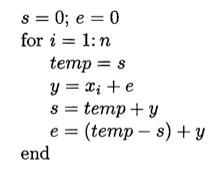

Considere o caso em que:
$$x_k = \begin{cases}113/100,&\text{se $k$ é par,}\\-111/100,&\text{se $k$ é ímpar.}\end{cases}$$

Escreva um código para calcular as somas $s_n = \sum_{k=1}^n x_k$, para $n$ igual, 500, 5000, 50000 e 500000. Compare os resultados obtidos sem usar o algoritmo de Kahan e quando o mesmo é aplicado. ,Calcule também os erros relativos associados com cada resultado. 

Relate o que você observou nesses resultados e explique brevemente por que isso acontece.

In [4]:
num_termos = [500, 5000, 50000, 500000] # Somente valores pares
valores_exatos = []

# Determinando os valores exatos para a soma
print("Valor exato da soma com:")

for i in range(len(num_termos)):
  if (num_termos[i] % 2 == 0):    # Se o número de termos é par então o valor exato da soma é n/100
    valores_exatos.append(num_termos[i] / 100)  
    print(f"{num_termos[i]} termos:\t{valores_exatos[i]}")
  else:                           # Caso contrário, então o valor exato da soma é (n-112)/100
    valores_exatos.append((num_termos[i] - 112) / 100) 
    print(f"{num_termos[i]} termos:\t{valores_exatos[i]}")
    

# Calculando a soma sem usar o algoritmo de Kahan
soma, i = 0, 0
print("\nResultados obtidos sem usar o algoritmo de Kahan com:")

for k in range(1, 500000+1):
  if (k % 2 == 0): soma += 113/100
  else: soma -= 111/100

  if(k == num_termos[i]):
    valor_exato = valores_exatos[i]
    print(f"{num_termos[i]} termos:\t{soma}\t\tErro relativo: {abs((valor_exato - soma) / valor_exato)}")
    i += 1


# Calculando a soma utilizando o algoritmo de Kahan
s, e = 0, 0
i = 0
print("\nResultados obtidos utilizando o algoritmo de Kahan com:")

for k in range(1, 500000+1):
  temp = s
  if (k % 2 == 0): y = 113/100
  else: y = -111/100 
  y += e
  s = temp + y
  e = (temp - s) + y

  if(k == num_termos[i]):
    valor_exato = valores_exatos[i]
    print(f"{num_termos[i]} termos:\t{s}\t\tErro relativo: {abs((valor_exato - s) / valor_exato)}")
    i += 1

Valor exato da soma com:
500 termos:	5.0
5000 termos:	50.0
50000 termos:	500.0
500000 termos:	5000.0

Resultados obtidos sem usar o algoritmo de Kahan com:
500 termos:	4.999999999999916		Erro relativo: 1.687538997430238e-14
5000 termos:	50.00000000000215		Erro relativo: 4.305888978706207e-14
50000 termos:	499.99999999965485		Erro relativo: 6.903064786456525e-13
500000 termos:	5000.000000027694		Erro relativo: 5.538822733797133e-12

Resultados obtidos utilizando o algoritmo de Kahan com:
500 termos:	4.9999999999999485		Erro relativo: 1.0302869668521452e-14
5000 termos:	49.99999999999949		Erro relativo: 1.0231815394945442e-14
50000 termos:	499.9999999999949		Erro relativo: 1.0231815394945442e-14
500000 termos:	4999.999999999949		Erro relativo: 1.0186340659856796e-14


# **Relatório**

Nome: Riquelme Freitas Gomes \
DRE: 120032785

\
## **Trabalho prático #1**
Os códigos presentes no trabalho foram elaborados por mim. Porém, determinadas partes do código foram desenvolvidas em dupla na sala de aula. Portanto, recebi uma ajuda inicial do aluno Jhayson Jales.

\
## **Tarefa #1: Calculando aproximações do número $\pi$.**
Para essa tarefa, implementei as fórmulas de Gregory-Leibniz, de Newton-Euler e de Bailey-Borwein-Plouffe citadas anteriormente, a fim de obter diferentes aproximações de π. Para cada uma das fórmulas considerei as séries truncadas com 5, 10, 50, 100 e 1000 termos e estimei o erro absoluto de cada aproximação utilizando como valor "exato" a aproximação math.pi fornecida pelo módulo math do Python. Obtive os seguintes resultados: 

```
Valor 'exato' do pi: 3.141592653589793

Aproximação de π, utilizando a fórmula de Gregory-Leibniz, com:
5 termos:	 3.3396825396825403		Erro absoluto: 0.19808988609274714
10 termos:	3.0418396189294032		Erro absoluto: 0.09975303466038987
50 termos:	3.121594652591011	 	Erro absoluto: 0.01999800099878213
100 termos:   3.1315929035585537		Erro absoluto: 0.00999975003123943
1000 termos:  3.140592653839794	 	Erro absoluto: 0.000999999749998981

Aproximação de π, utilizando a fórmula de Newton-Euler, com:
5 termos:	 3.098412698412698	 	Erro absoluto: 0.04317995517709505
10 termos:	3.140578169680336		 Erro absoluto: 0.0010144839094570202
50 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
100 termos:   3.1415926535897922		Erro absoluto: 8.881784197001252e-16
1000 termos:  3.1415926535897922		Erro absoluto: 8.881784197001252e-16

Aproximação de π, utilizando a fórmula de Bailey-Borwein-Plouffe, com:
5 termos:	 3.1415926454603365		Erro absoluto: 8.12945666339715e-09
10 termos:	3.1415926535897913		Erro absoluto: 1.7763568394002505e-15
50 termos:	3.141592653589793	 	Erro absoluto: 0.0
100 termos:   3.141592653589793		 Erro absoluto: 0.0
1000 termos:  3.141592653589793	     Erro absoluto: 0.0
```

Observando os resultados, é possível notar que, para qualquer uma das três fórmulas, quanto maior o número de termos utilizados menor é o erro absoluto e, portanto, melhor fica a aproximação. 

Além disso, comparando os números, é perceptível que, dentre as três, a fórmula de Bailey-Borwein-Plouffe apresenta os valores mais próximos ao valor 'exato' do pi, e manifesta erro absoluto igual a zero quando são considerados 50 termos ou mais. Dessa forma, uma vez que as outras aproximações apresentaram erros maiores para qualquer quantidade de termos, concluo que o método que utiliza a fórmula de Bailey-Borwein-Plouffe deu o melhor resultado, enquanto o método que utiliza a fórmula de Gregory-Leibniz deu o pior resultado.

\
## **Tarefa #2: Melhorando alguns resultados da Tarefa 1**

\
### **a) Soma truncada na ordem inversa**

Para essa tarefa, implementei a estratégia da soma truncada na ordem inversa para as fórmulas de Gregory-Leibniz, de Newton-Euler e de Bailey-Borwein-Plouffe, com o objetivo de melhorar os resultados das somas truncadas apresentados na tarefa 1. Obtive os seguintes resultados: 

```
Valor 'exato' do pi: 3.141592653589793

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Gregory-Leibniz, com:
5 termos:	 3.33968253968254		 Erro absoluto: 0.1980898860927467
10 termos:	3.0418396189294024	   Erro absoluto: 0.09975303466039076
50 termos:	3.1215946525910105	   Erro absoluto: 0.019998000998782572
100 termos:   3.131592903558553		Erro absoluto: 0.009999750031240318
1000 termos:  3.140592653839793		Erro absoluto: 0.0009999997500003133

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Newton-Euler, com:
5 termos:	 3.0984126984126985	   Erro absoluto: 0.04317995517709461
10 termos:	3.140578169680337		Erro absoluto: 0.001014483909456132
50 termos:    3.1415926535897927	   Erro absoluto: 4.440892098500626e-16
100 termos:   3.141592653589793		Erro absoluto: 0.0
1000 termos:  3.141592653589793		Erro absoluto: 0.0

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Bailey-Borwein-Plouffe, com:
5 termos:	 3.1415926454603365	   Erro absoluto: 8.12945666339715e-09
10 termos:	3.1415926535897913	   Erro absoluto: 1.7763568394002505e-15
50 termos:	3.141592653589793		Erro absoluto: 0.0
100 termos:   3.141592653589793		Erro absoluto: 0.0
1000 termos:  3.141592653589793		Erro absoluto: 0.0
```

Vamos comparar com as respostas obtidas na tarefa 1 em cada fórmula separadamente:

\
**Fórmula de Gregory-Leibniz normal e na ordem inversa**
```
Valor 'exato' do pi: 3.141592653589793

Aproximação de π, utilizando a fórmula de Gregory-Leibniz, com:
5 termos:	 3.3396825396825403		Erro absoluto: 0.19808988609274714
10 termos:	3.0418396189294032		Erro absoluto: 0.09975303466038987
50 termos:	3.121594652591011	 	Erro absoluto: 0.01999800099878213
100 termos:   3.1315929035585537		Erro absoluto: 0.00999975003123943
1000 termos:  3.140592653839794	 	Erro absoluto: 0.000999999749998981

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Gregory-Leibniz, com:
5 termos:	 3.33968253968254		 Erro absoluto: 0.1980898860927467
10 termos:	3.0418396189294024	   Erro absoluto: 0.09975303466039076
50 termos:	3.1215946525910105	   Erro absoluto: 0.019998000998782572
100 termos:   3.131592903558553		Erro absoluto: 0.009999750031240318
1000 termos:  3.140592653839793		Erro absoluto: 0.0009999997500003133
```
A aproximação feita na ordem inversa apresentou melhora (diminuição do erro absoluto) apenas considerando 5 termos, em todos os outros casos ela piorou. Logo, a soma truncada na ordem inversa não se mostrou muito eficaz para a fórmula de Gregory-Leibniz.

\
**Fórmula de Newton-Euler normal e na ordem inversa**
```
Aproximação de π, utilizando a fórmula de Newton-Euler, com:
5 termos:	 3.098412698412698	 	Erro absoluto: 0.04317995517709505
10 termos:	3.140578169680336		 Erro absoluto: 0.0010144839094570202
50 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
100 termos:   3.1415926535897922		Erro absoluto: 8.881784197001252e-16
1000 termos:  3.1415926535897922		Erro absoluto: 8.881784197001252e-16

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Newton-Euler, com:
5 termos:	 3.0984126984126985	   Erro absoluto: 0.04317995517709461
10 termos:	3.140578169680337		Erro absoluto: 0.001014483909456132
50 termos:    3.1415926535897927	   Erro absoluto: 4.440892098500626e-16
100 termos:   3.141592653589793		Erro absoluto: 0.0
1000 termos:  3.141592653589793		Erro absoluto: 0.0
```
A aproximação feita na ordem inversa apresentou melhora para todas as quantidades de termos considerados, proporcionando zero de erro absoluto quando consideradas maiores quantidades de termos. Portanto, a estratégia se mostrou muito vantajosa para a fórmula de Newton-Euler.

\
**Fórmula de Bailey-Borwein-Plouffe normal e na ordem inversa**
```
Aproximação de π, utilizando a fórmula de Bailey-Borwein-Plouffe, com:
5 termos:	 3.1415926454603365		Erro absoluto: 8.12945666339715e-09
10 termos:	3.1415926535897913		Erro absoluto: 1.7763568394002505e-15
50 termos:	3.141592653589793	 	Erro absoluto: 0.0
100 termos:   3.141592653589793		 Erro absoluto: 0.0
1000 termos:  3.141592653589793	     Erro absoluto: 0.0

Aproximação de π, realizando a soma truncada na ordem inversa pela fórmula de Bailey-Borwein-Plouffe, com:
5 termos:	 3.1415926454603365	   Erro absoluto: 8.12945666339715e-09
10 termos:	3.1415926535897913	   Erro absoluto: 1.7763568394002505e-15
50 termos:	3.141592653589793		Erro absoluto: 0.0
100 termos:   3.141592653589793		Erro absoluto: 0.0
1000 termos:  3.141592653589793		Erro absoluto: 0.0
```
A aproximação feita na ordem inversa apresentou os mesmos resultados obtidos anteriormente para todas as quantidades de termos considerados.

\
É possível concluir, portanto, que de certa forma houve uma melhoria na qualidade dos resultados principalmente para a Fórmula de Newton-Euler. Isso acontece, muito provavelmente, por conta do cálculo de fatoriais e potências, que fazem com que tal fórmula perca qualidade em seus resultados. Assim, uma vez que se inverte a ordem das séries, menores quantidades de erros se acumulam na soma.

\
### **b) Evitando o cálculo dos fatoriais**

Para essa tarefa, implementei uma nova forma de aproximar  π no caso particular da fórmula de Newton-Euler. Essa ideia consiste em evitar o cálculo dos fatoriais presentes no cálculo de cada termo da série. Como dado pelo enunciado, cada termo deve ser encontrado da seguinte forma recursiva:

$$ a_{k+1} = \left(\frac{k+1}{2k+3}\right) a_k,\quad k=0,1,\dots. $$

E para calcular o somatório por essa forma, antes definimos o caso base $a_{0}$ pela forma com os fatoriais.

$$ a_k = \frac{(2)^{k}(k!)^2}{(2k+1)!},\quad k=0,1,\dots, $$ 
\
$$ (k = 0) \quad\quad a_0 = \frac{(2)^{0}(0!)^2}{(2*0+1)!} = \frac{1}{1} = 1 \quad\quad a_{0} = 1 $$ 

\
A partir disso, implementei o somatório pela forma recursiva considerando o caso base $a_{0} = 1$. Obtive os seguintes resultados:

```
Valor 'exato' do pi: 3.141592653589793

Aproximação de π, utilizando a fórmula de Newton-Euler, com:
5 termos:	 3.098412698412698		 Erro absoluto: 0.04317995517709505
10 termos:	3.140578169680336		 Erro absoluto: 0.0010144839094570202
50 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
100 termos:   3.1415926535897922		Erro absoluto: 8.881784197001252e-16
1000 termos:  3.1415926535897922		Erro absoluto: 8.881784197001252e-16

Aproximação de π, utilizando a fórmula de Newton-Euler e evitando o cálculo dos fatoriais, com:
5 termos:	 3.121500721500721		 Erro absoluto: 0.020091932089072007
10 termos:	3.141106021601377		 Erro absoluto: 0.0004866319884162529
50 termos:	3.1415926535897922		Erro absoluto: 8.881784197001252e-16
100 termos:   3.1415926535897922		Erro absoluto: 8.881784197001252e-16
1000 termos:  3.1415926535897922		Erro absoluto: 8.881784197001252e-16
```

Comparando com números da tarefa 1, percebe-se que houve melhoria considerável na qualidade dos resultados, uma vez que os erros se tornaram menores e as aproximações de pi mais próximas do valor 'exato'.

\
## **Tarefa #3: Soma compensada de Kahan**

Para essa tarefa, implementei um código para calcular as somas $s_n = \sum_{k=1}^n x_k$, para $n$ igual a 500, 5000, 50000 e 500000, tal que:
$$ x_k = \begin{cases}113/100,&\text{se $k$ é par,}\\-111/100,&\text{se $k$ é ímpar.}\end{cases} $$

Codifiquei tal soma das duas seguintes formas: 

i) sem aplicar o algoritmo de Kahan                        
ii) aplicando o algoritmo de Kahan.

Dado que o algoritmo de Kahan tem o objetivo de diminuir o efeito dos erros de arredondamento do computador no resultado da soma.
Porém, para calcular também os erros relativos associados com cada resultado, antes precisamos determinar os valores exatos da soma para um $n$ qualquer. Temos 2 casos possíveis:

\
### $1$. "n" é par
Nesse caso, sabendo que $k$ vai de $1$ a $n$, teremos $n/2$ termos em que k é par e $n/2$ termos em que k é impar. Portanto, o valor exato da soma será:

$$ s_n = \sum_{k=1}^n x_k = (\frac{113}{100})(\frac{n}{2}) + (\frac{-111}{100})(\frac{n}{2}) = (\frac{113-111}{100})(\frac{n}{2}) = (\frac{2}{100})(\frac{n}{2}) = (\frac{n}{100}) $$

\
### $2$. "n" é ímpar
Nesse caso, sabemos que $(n-1)$ é par. Pelo caso anterior, descobrimos que o valor exato da soma para os $(n-1)$ primeiros termos é $(n-1)/100$. Portanto, basta somarmos ainda o último termo $(k = n)$, o qual sabemos que é ímpar e, por isso, deve ser igual a $(-111/100)$. Logo, o valor exato da soma será:

$$ s_n = \sum_{k=1}^n x_k = \frac{(n-1)}{100} - \frac{111}{100} = \frac{(n-112)}{100} $$

\
Uma vez que estão definidos os valores exatos, podemos comparar os resultados obtidos no cálculo das somas  $s_n = \sum_{k=1}^n x_k$, para $n$ igual a 500, 5000, 50000 e 500000, sem e com o algoritmo de Kahan.

```
Valor exato da soma com:
500 termos:	 5.0
5000 termos:	50.0
50000 termos:   500.0
500000 termos:  5000.0

Resultados obtidos sem usar o algoritmo de Kahan com:
500 termos:	 4.999999999999916		Erro relativo: 1.687538997430238e-14
5000 termos:	50.00000000000215		Erro relativo: 4.305888978706207e-14
50000 termos:   499.99999999965485	   Erro relativo: 6.903064786456525e-13
500000 termos:  5000.000000027694		Erro relativo: 5.538822733797133e-12

Resultados obtidos utilizando o algoritmo de Kahan com:
500 termos:     4.9999999999999485	   Erro relativo: 1.0302869668521452e-14
5000 termos:	49.99999999999949		Erro relativo: 1.0231815394945442e-14
50000 termos:   499.9999999999949	    Erro relativo: 1.0231815394945442e-14
500000 termos:  4999.999999999949		Erro relativo: 1.0186340659856796e-14
```

A partir desses resultados, foi possível observar que as aproximações feitas utilizando o algoritmo de Kahan se mostraram bem eficientes já que os erros relativos foram pequenos independente do número de termos considerados. Além disso, os resultados com o uso desse algoritmo se revelaram melhores quando em comparação aos que não se utilizaram do mesmo.



